In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
advertising.head()

NameError: name 'advertising' is not defined

In [37]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### DataSet 

http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv

Suppose that in our role as statistical consultants we are asked to suggest,
on the basis of this data, a marketing plan for next year that will result in
high product sales.

What information would be useful in order to provide
such a recommendation?

#### Answers 


    - Is there a relationship between advertising budget and sales ?
    - How strong is the relationship between advertising budget and sales?
    - Which media contribute to sales?
    - How accurately can we estimate the effect of each medium on sales?
    - How accurately can we predict future sales?
    - Is the relationship linear?
    - Is there synergy among the advertising media?

### Code datset 

In [38]:
import pathlib

INPUT = pathlib.Path("../data")
INPUT , INPUT.is_dir()

(PosixPath('../data'), True)

In [50]:
advertising = pd.read_csv(INPUT/"Advertising.csv", usecols=[1,2,3,4], low_memory=False)
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [51]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [40]:
credit = pd.read_csv(INPUT/'Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})

credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


Simple linear regression lives up to its name: 

it is a very straightforward
approach for predicting a quantitative 
response Y on the basis of a single predictor variable X. 

It assumes that there is approximately a linear
relationship between X and Y

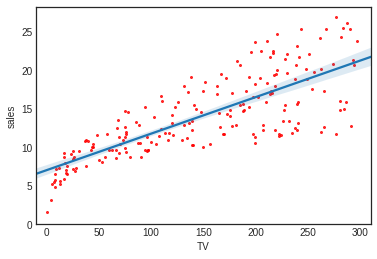

In [68]:

sns.regplot(advertising.TV, advertising.sales,  scatter_kws={'color':'r', 's':4})
plt.xlim(-10,310)
plt.ylim(ymin=0);

(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([-146.3425, -116.7725,  -87.2025,  -57.6325,  -28.0625,    1.5075,
          31.0775,   60.6475,   90.2175,  119.7875,  149.3575]),
 <a list of 10 Patch objects>)

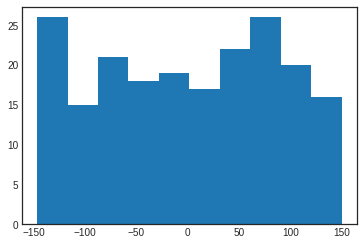

In [69]:
plt.hist(X)

In [71]:
advertising.TV , X

(0      230.1
 1       44.5
 2       17.2
 3      151.5
 4      180.8
        ...  
 195     38.2
 196     94.2
 197    177.0
 198    283.6
 199    232.1
 Name: TV, Length: 200, dtype: float64, array([[  83.0575],
        [-102.5425],
        [-129.8425],
        [   4.4575],
        [  33.7575],
        [-138.3425],
        [ -89.5425],
        [ -26.8425],
        [-138.4425],
        [  52.7575],
        [ -80.9425],
        [  67.6575],
        [-123.2425],
        [ -49.5425],
        [  57.0575],
        [  48.3575],
        [ -79.2425],
        [ 134.3575],
        [ -77.8425],
        [   0.2575],
        [  71.3575],
        [  90.3575],
        [-133.8425],
        [  81.2575],
        [ -84.7425],
        [ 115.8575],
        [  -4.1425],
        [  93.0575],
        [ 101.7575],
        [ -76.4425],
        [ 145.8575],
        [ -34.1425],
        [ -49.8425],
        [ 118.5575],
        [ -51.3425],
        [ 143.6575],
        [ 119.8575],
        [ -72.3425],
        [

In [ ]:
advertising.TV

In [77]:
scale(advertising.TV, with_mean=True, with_std=False).shape

(200,)

In [85]:
scale(advertising.TV, with_mean=True, with_std=False).reshape(-1, 1).shape

(200, 1)

14.0225
[0.04753664]


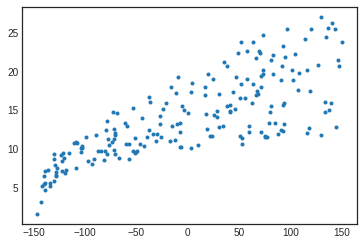

In [74]:
# Regression coefficients (Ordinary Least Squares)1
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)
plt.plot(X,y, ".")

In [43]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000 # j 

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000 # j min 
min_rss

2.1025305831313514

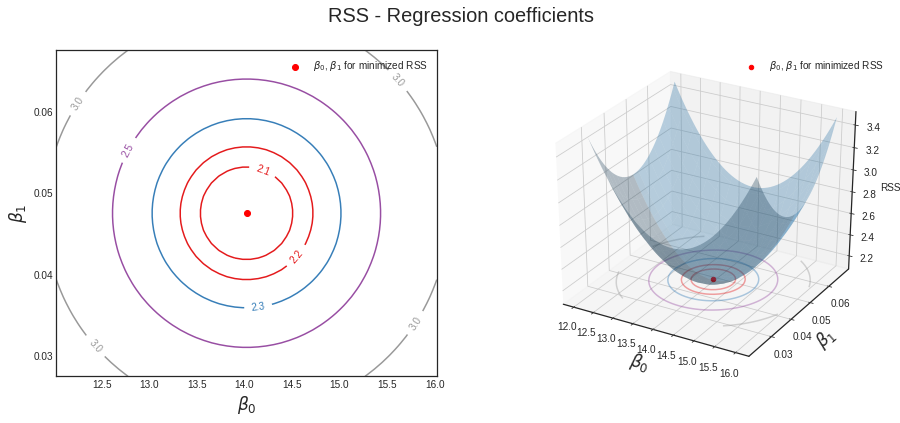

In [44]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

In [23]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.58e-96
Time:                        12:18:35   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
est.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [24]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [27]:

regr = skl_lm.LinearRegression()

X = advertising[['radio', 'TV']].as_matrix()
y = advertising.sales

regr.fit(X,y)          1.509960e-81

print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


/home/nithin/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
advertising[['radio', 'TV']].describe()

,radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [29]:

# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

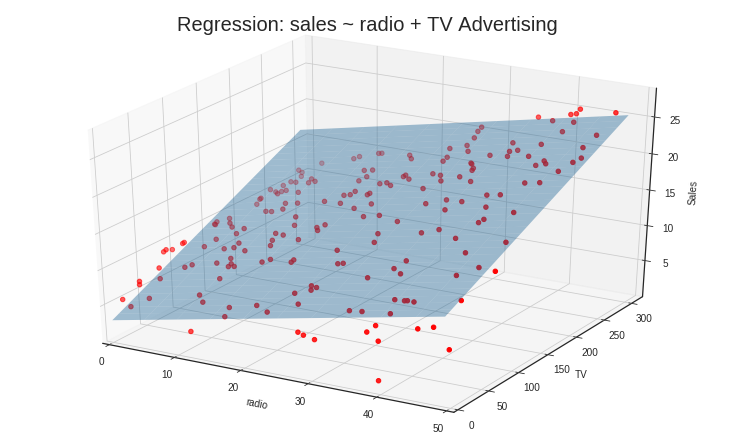

In [33]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: sales ~ radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.radio, advertising.TV, advertising.sales, c='r')

ax.set_xlabel('radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(bottom=0)
ax.set_zlabel('Sales');